![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)
# **Filtering Colors**

####**In this lesson we'll learn:**
1. How to use the HSV Color Space to Filter by Color

#### **Remember The HSV Color Space**

![](https://answers.opencv.org/upfiles/15186766673210035.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

!unzip -qq images.zip

--2023-05-24 14:02:22--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.86
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.0MB/s    in 2.2s    

2023-05-24 14:02:25 (13.0 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    h, w = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

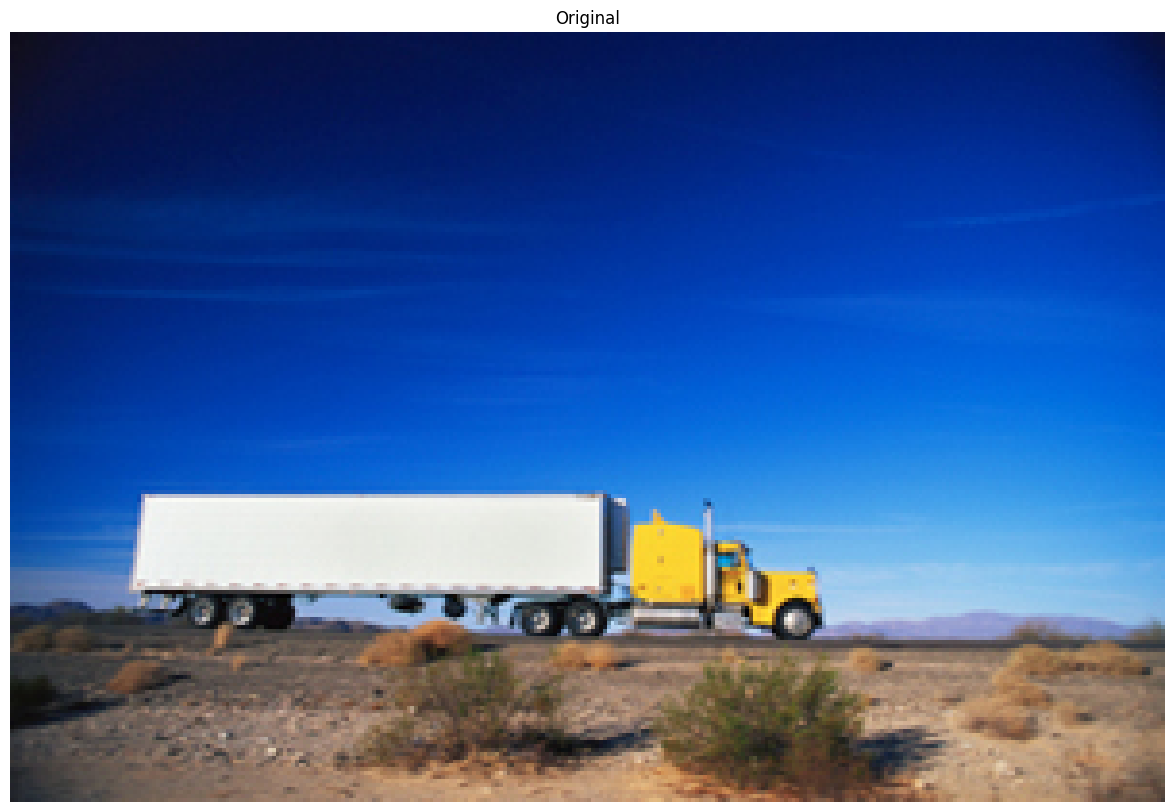

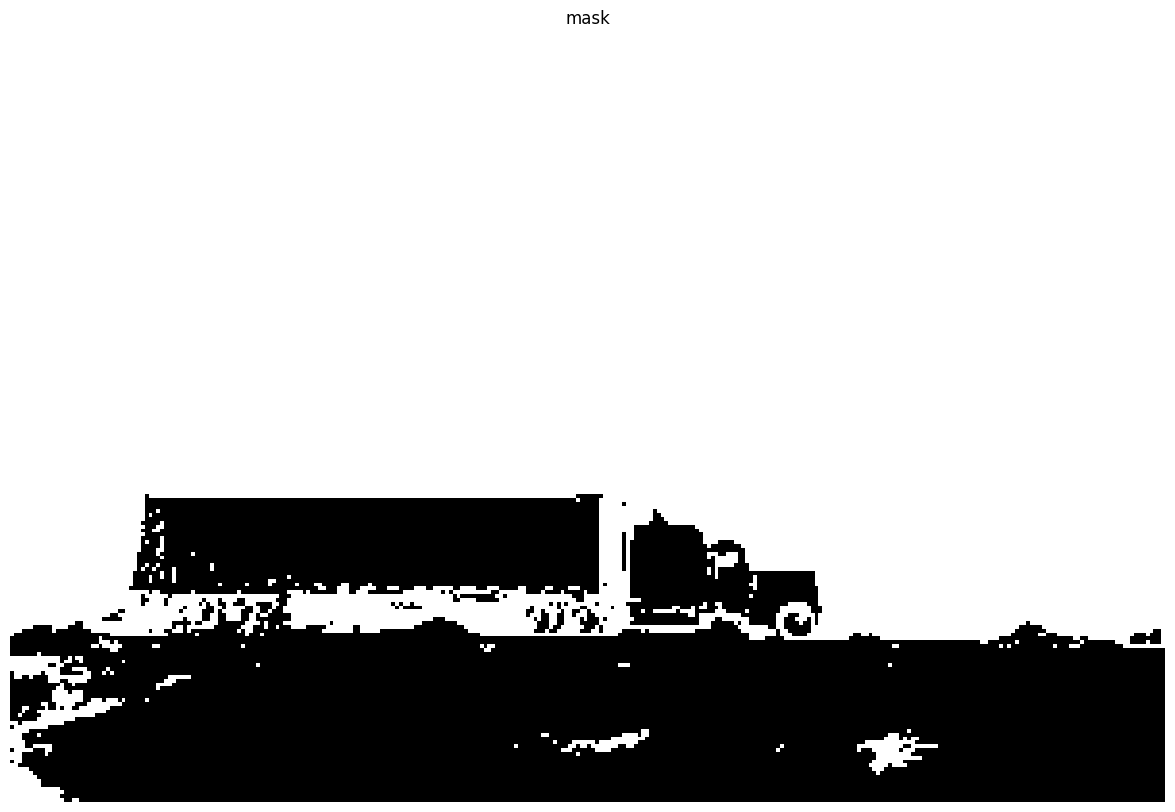

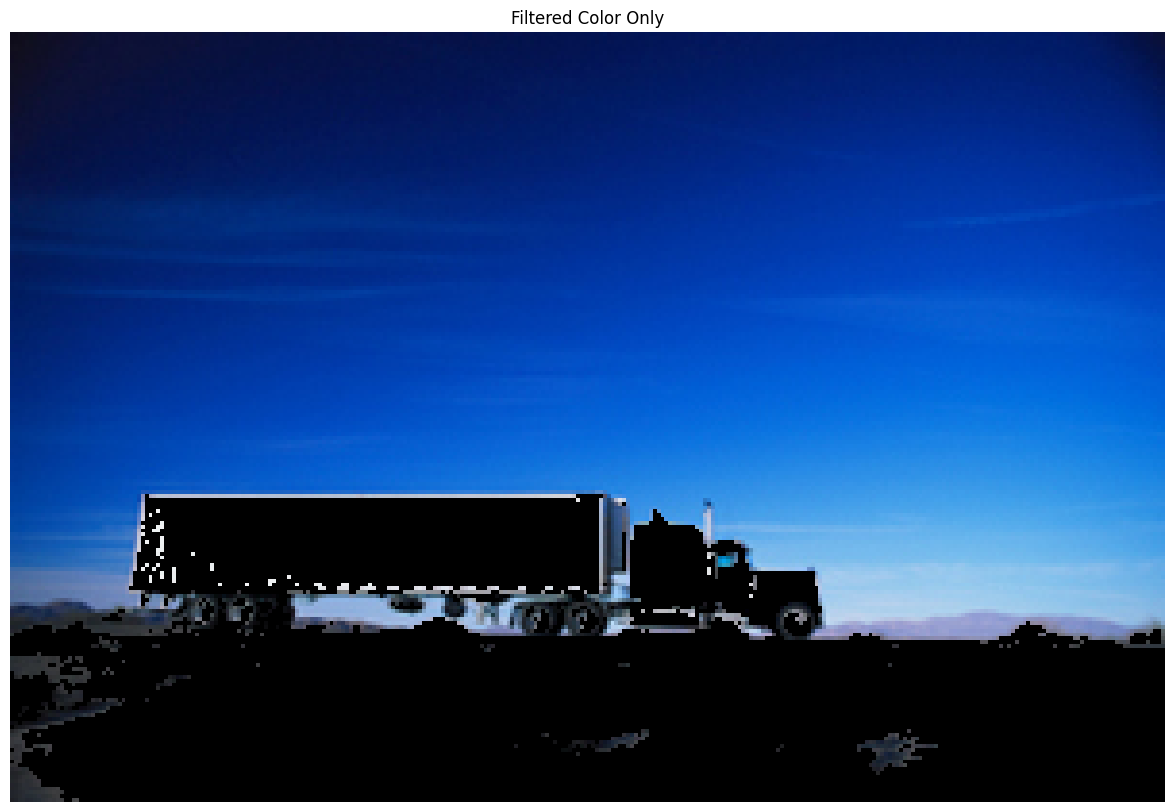

In [3]:
image = cv2.imread('images/truck.jpg')

# define range of BLUE color in HSV
lower = np.array([90,0,0])
upper = np.array([135,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper 
mask = cv2.inRange(hsv_img, lower, upper)

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)  
imshow('mask', mask)
imshow('Filtered Color Only', res)

#### **Filtering out Red**


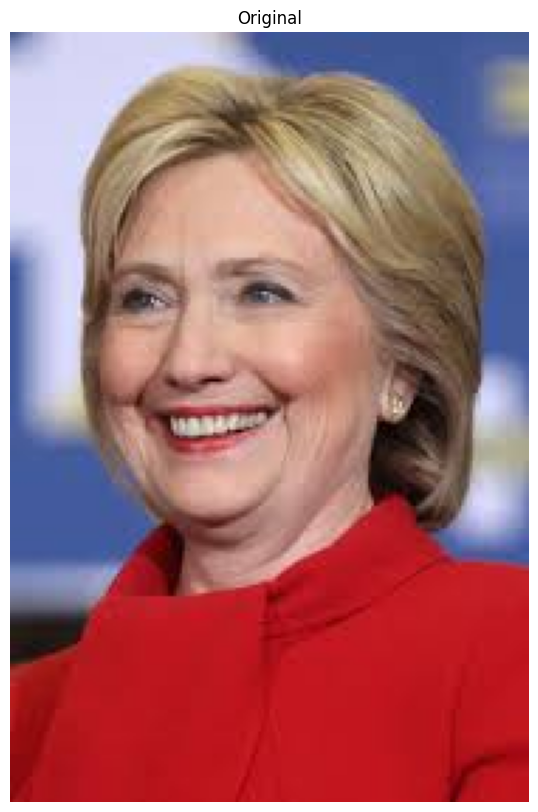

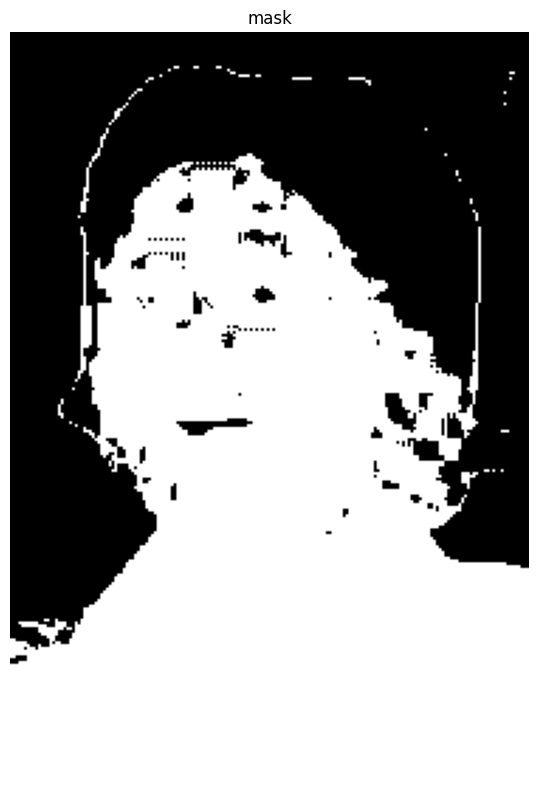

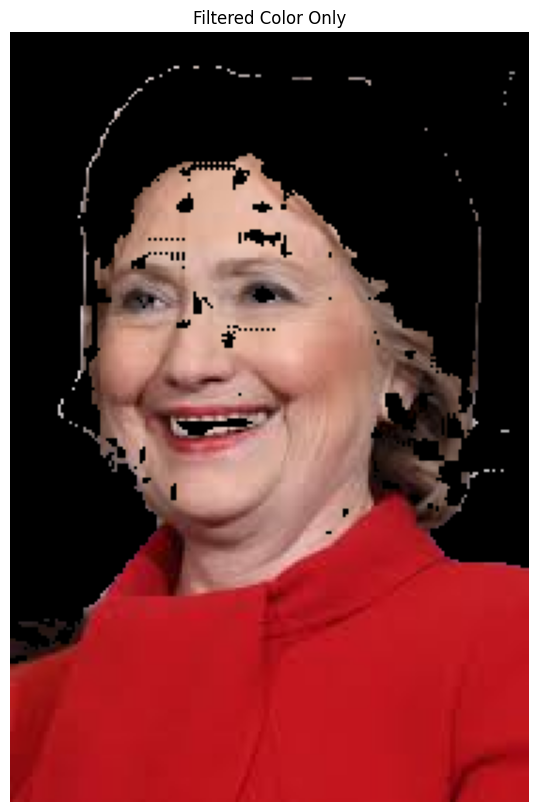

In [4]:
image = cv2.imread("./images/Hillary.jpg")

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,0,0])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,0,0])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join masks
mask = mask0+mask1

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)  
imshow('mask', mask)
imshow('Filtered Color Only', res)